In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


In [59]:
df = pd.read_csv('/content/drive/MyDrive/project python/fact_trips.csv')
df1 = pd.read_csv('/content/drive/MyDrive/project python/city_target_passenger_rating.csv')
df2 = pd.read_csv('/content/drive/MyDrive/project python/dim_city.csv')
df3 = pd.read_csv('/content/drive/MyDrive/project python/dim_date.csv')
df4 = pd.read_csv('/content/drive/MyDrive/project python/dim_repeat_trip_distribution.csv')
df5 = pd.read_csv('/content/drive/MyDrive/project python/fact_passenger_summary.csv')
df6 = pd.read_csv('/content/drive/MyDrive/project python/monthly_target_new_passengers.csv')
df7 = pd.read_csv('/content/drive/MyDrive/project python/monthly_target_trips.csv')


In [60]:
df.head()

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8


In [61]:
df1.head()

,city_id,target_avg_passenger_rating
0,CH01,8.00
1,UP01,7.25
2,AP01,8.50
3,MP01,8.00
4,RJ01,8.25


In [62]:
df2.head()

,city_id,city_name
0,RJ01,Jaipur
1,UP01,Lucknow
2,GJ01,Surat
3,KL01,Kochi
4,MP01,Indore


In [63]:
df3.head()

,date,start_of_month,month_name,day_type
0,2024-01-01,2024-01-01,January,Weekday
1,2024-01-02,2024-01-01,January,Weekday
2,2024-01-03,2024-01-01,January,Weekday
3,2024-01-04,2024-01-01,January,Weekday
4,2024-01-05,2024-01-01,January,Weekday


In [64]:
df4.head()

,month,city_id,trip_count,repeat_passenger_count
0,2024-01-01,AP01,10-Trips,7
1,2024-01-01,AP01,2-Trips,352
2,2024-01-01,AP01,3-Trips,158
3,2024-01-01,AP01,4-Trips,53
4,2024-01-01,AP01,5-Trips,38


In [65]:
df5.head()

,month,city_id,new_passengers,repeat_passengers,total_passengers
0,2024-01-01,AP01,2513,650,3163
1,2024-01-01,CH01,3920,720,4640
2,2024-01-01,GJ01,2432,1184,3616
3,2024-01-01,GJ02,2089,544,2633
4,2024-01-01,KA01,1957,172,2129


In [66]:
df6.head()

,month,city_id,target_new_passengers
0,2024-05-01,GJ01,1500
1,2024-05-01,GJ02,1500
2,2024-03-01,GJ01,2000
3,2024-05-01,UP01,2000
4,2024-05-01,MP01,2000


In [133]:
df7.head()

,month,city_id,total_target_trips
0,2024-03-01,MP01,7000
1,2024-05-01,KA01,2500
2,2024-04-01,UP01,11000
3,2024-02-01,GJ02,6000
4,2024-05-01,KL01,9000


In [68]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trip_id                 425903 non-null  object
 1   date                    425903 non-null  object
 2   city_id                 425903 non-null  object
 3   passenger_type          425903 non-null  object
 4   distance_travelled(km)  425903 non-null  int64 
 5   fare_amount             425903 non-null  int64 
 6   passenger_rating        425903 non-null  int64 
 7   driver_rating           425903 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 26.0+ MB


(425903, 8)

1.	Top and Bottom Performing Cities
•	Identify the top 3 and bottom 3 cities by total trips over the entire analysis period.


In [69]:
finaldf=pd.merge(df,df2,how='left',on='city_id')
finaldf

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating,city_name
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5,Lucknow
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5,Vadodara
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8,Coimbatore
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10,Kochi
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8,Visakhapatnam
...,...,...,...,...,...,...,...,...,...
425898,TRPLUC2403180b02b4d0,2024-03-18,UP01,repeated,12,134,5,5,Lucknow
425899,TRPVAD2401032679e669,2024-01-03,GJ02,repeated,12,114,7,5,Vadodara
425900,TRPJAI24022578e10280,2024-02-25,RJ01,repeated,26,479,7,10,Jaipur
425901,TRPJAI240401e297ad20,2024-04-01,RJ01,repeated,27,361,7,10,Jaipur


In [70]:
finaldf1=pd.merge(finaldf,df1,how='left',on='city_id')
finaldf1

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating,city_name,target_avg_passenger_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5,Lucknow,7.25
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5,Vadodara,7.50
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8,Coimbatore,8.25
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10,Kochi,8.50
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8,Visakhapatnam,8.50
...,...,...,...,...,...,...,...,...,...,...
425898,TRPLUC2403180b02b4d0,2024-03-18,UP01,repeated,12,134,5,5,Lucknow,7.25
425899,TRPVAD2401032679e669,2024-01-03,GJ02,repeated,12,114,7,5,Vadodara,7.50
425900,TRPJAI24022578e10280,2024-02-25,RJ01,repeated,26,479,7,10,Jaipur,8.25
425901,TRPJAI240401e297ad20,2024-04-01,RJ01,repeated,27,361,7,10,Jaipur,8.25


In [71]:
finaldf.isnull().sum()

,0
trip_id,0
date,0
city_id,0
passenger_type,0
distance_travelled(km),0
fare_amount,0
passenger_rating,0
driver_rating,0
city_name,0


TOP AND Bottom CITIES



In [72]:
city_count=finaldf.groupby('city_name').agg(City=('city_name', 'count'))
print(city_count.sort_values(by='City',ascending=False).head(3))
print(city_count.sort_values(by='City',ascending=False).tail(3))

            City
city_name       
Jaipur     76888
Lucknow    64299
Surat      54843
                City
city_name           
Visakhapatnam  28366
Coimbatore     21104
Mysore         16238


In [73]:
sorted_city_count = city_count.sort_values(by='City', ascending=False)
display(sorted_city_count)

,City
city_name,
Jaipur,76888
Lucknow,64299
Surat,54843
Kochi,50702
Indore,42456
Chandigarh,38981
Vadodara,32026
Visakhapatnam,28366
Coimbatore,21104


In [74]:
print('Top 3 Cities:')
display(sorted_city_count.head(3))

print('\nBottom 3 Cities:')
display(sorted_city_count.tail(3))

Top 3 Cities:


,City
city_name,
Jaipur,76888
Lucknow,64299
Surat,54843



Bottom 3 Cities:


,City
city_name,
Visakhapatnam,28366
Coimbatore,21104
Mysore,16238


2.	Average Fare per Trip by City
  Calculate the average fare per trip for each city and compare it with the city's average trip distance. Identify the cities with the highest and lowest average fare per trip to assess pricing efficiency across locations.


Average fare per city and Average Trip Distance



In [75]:
city_avg_fare=finaldf.groupby('city_name').agg(average_fare=('fare_amount','mean'),
                                            average_distance=('distance_travelled(km)','mean'))
city_avg_fare

,average_fare,average_distance
city_name,,
Chandigarh,283.686950,23.518714
Coimbatore,166.982183,14.979198
Indore,179.838609,16.502473
Jaipur,483.918128,30.023125
Kochi,335.245079,24.065461
Lucknow,147.180376,12.512963
Mysore,249.707168,16.496921
Surat,117.272925,10.997247
Vadodara,118.566165,11.517736


3.	Average Ratings by City and Passenger Type
•	Calculate the average passenger and driver ratings for each city, segmented by passenger type (new vs. repeat). Identify cities with the highest and lowest average ratings.


Average Rating by Passanger Type by Driver and Passanger

In [76]:
city_avg_Rating=finaldf.groupby(['city_name','passenger_type']).agg(average_P_Rating=('passenger_rating','mean'),
                                            average_D_Rating=('driver_rating','mean'))
city_avg_Rating

average_P_Rating  average_D_Rating
city_name     passenger_type                                    
Chandigarh    new                     8.489158          7.992120
              repeated                7.493798          7.472824
Coimbatore    new                     8.485788          7.990604
              repeated                7.475457          7.480778
Indore        new                     8.485837          7.970800
              repeated                7.473961          7.477404
Jaipur        new                     8.985018          8.988246
              repeated                7.991042          8.984790
Kochi         new                     8.987394          8.985350
              repeated                8.003665          8.989830
Lucknow       new                     7.977429          6.990406
              repeated                5.985741          6.491663
Mysore        new                     8.982964          8.982878
              repeated                7.978495          8.965767
Surat         new                     7.984173          6.994925
              repeated                5.995511          6.479441
Vadodara      new                     7.979263          7.004147
              repeated                5.978629          6.481072
Visakhapatnam new                     8.976151          8.979995
              repeated                7.989628          8.992701

**Reasoning**:
To calculate the average 'passenger_rating' and 'driver_rating' for each 'city_name' and 'passenger_type', I will group the 'finaldf' DataFrame by these two columns and apply the mean aggregation.



**Reasoning**:
To identify cities with the highest and lowest average passenger and driver ratings across all passenger types, I will first calculate the overall average passenger and driver ratings for each city by grouping `city_passenger_type_avg_ratings` by `city_name` and taking the mean. Then, I will find the city with the maximum and minimum values for each rating type.



In [77]:
highest_avg_passenger_rating_city= city_avg_Rating['average_P_Rating'].idxmax()
lowest_avg_passenger_rating_city = city_avg_Rating['average_P_Rating'].idxmin()
highest_avg_driver_rating_city = city_avg_Rating['average_D_Rating'].idxmax()
lowest_avg_driver_rating_city = city_avg_Rating['average_D_Rating'].idxmin()
print(f"{highest_avg_passenger_rating_city} ({city_avg_Rating['average_P_Rating'].max():.2f})")
print(f"{lowest_avg_passenger_rating_city} ({city_avg_Rating['average_P_Rating'].min():.2f})")
print(f"{highest_avg_driver_rating_city} ({city_avg_Rating['average_D_Rating'].max():.2f})")
print(f"{lowest_avg_driver_rating_city} ({city_avg_Rating['average_D_Rating'].min():.2f})")

('Kochi', 'new') (8.99)
('Vadodara', 'repeated') (5.98)
('Visakhapatnam', 'repeated') (8.99)
('Surat', 'repeated') (6.48)


**Reasoning**:
To visualize the average passenger and driver ratings for each city and passenger type, I will create bar charts. First, I need to reset the index of the `city_passenger_type_avg_ratings` DataFrame to convert the multi-index into columns, which makes it easier to plot.



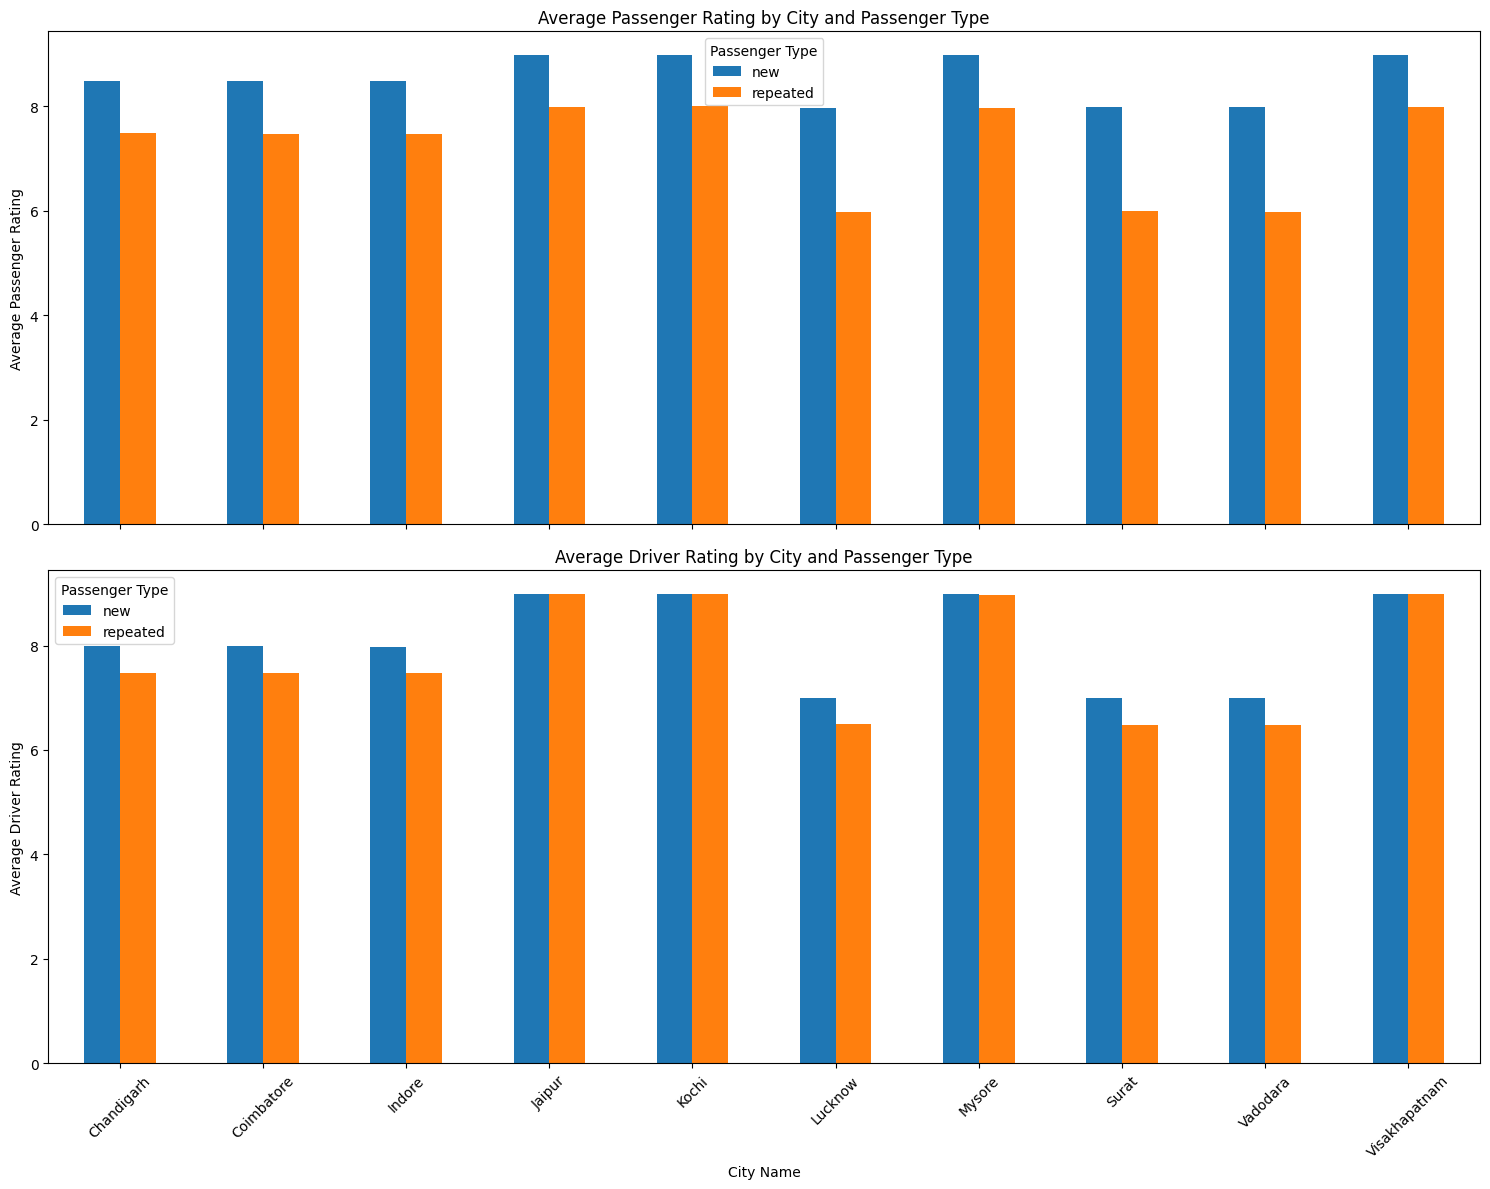

In [78]:
import matplotlib.pyplot as plt

# Reset index to make 'city_name' and 'passenger_type' regular columns for plotting
plot_df = city_avg_Rating.reset_index()

# Create separate plots for average passenger rating and average driver rating
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12), sharex=True)

# Plot Average Passenger Rating
plot_df.pivot(index='city_name', columns='passenger_type', values='average_P_Rating').plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Passenger Rating by City and Passenger Type')
axes[0].set_ylabel('Average Passenger Rating')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Passenger Type')

# Plot Average Driver Rating
plot_df.pivot(index='city_name', columns='passenger_type', values='average_D_Rating').plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Driver Rating by City and Passenger Type')
axes[1].set_ylabel('Average Driver Rating')
axes[1].set_xlabel('City Name')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Passenger Type')

plt.tight_layout()
plt.show()

**Reasoning**:
Before merging, I will convert the 'date' column in both `finaldf` and `df3` to datetime objects to ensure proper merging and handling of date information.



4.	Peak and Low Demand Months by City
•	For each city, identify the month with the highest total trips (peak demand) and the month with the lowest total trips (low demand). This analysis will help Goodcabs understand seasonal patterns and adjust resources accordingly.


In [79]:
finaldf['date'] = pd.to_datetime(finaldf['date'])
df3['date'] = pd.to_datetime(df3['date'])

merged_df = pd.merge(finaldf, df3, on='date', how='left')
merged_df.head()

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating,city_name,start_of_month,month_name,day_type
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5,Lucknow,2024-01-01,January,Weekend
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5,Vadodara,2024-01-01,January,Weekday
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8,Coimbatore,2024-01-01,January,Weekend
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10,Kochi,2024-03-01,March,Weekday
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8,Visakhapatnam,2024-06-01,June,Weekend


**Reasoning**:
Now that the dataframes are merged and contain month information, I will calculate the total number of trips per city per month by grouping the `merged_df` by `city_name` and `month_name` and then counting the occurrences of `trip_id`.



In [80]:
monthly_trips = merged_df.groupby(['city_name', 'month_name']).agg(total_trips=('trip_id', 'count'))# can add here.resetindex()
monthly_trips.head()

total_trips
city_name  month_name             
Chandigarh April              5566
           February           7387
           January            6810
           June               6029
           March              6569

**Reasoning**:
The previous attempt to reset the index and set categorical types failed because `monthly_trips` had already been reset, leading to a `ValueError`. To fix this, I will recalculate `monthly_trips` from `merged_df` to ensure it is in its original grouped state, then apply `reset_index()` once, convert the 'month_name' column to an ordered categorical type, and finally sort the DataFrame by `total_trips` in descending order.



In [81]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June']

# Recalculate monthly_trips from merged_df to ensure a clean state
monthly_trips = merged_df.groupby(['city_name', 'month_name']).agg(total_trips=('trip_id', 'count')).reset_index()

# Convert 'month_name' to a categorical type with specified order
monthly_trips['month_name'] = pd.Categorical(monthly_trips['month_name'], categories=month_order, ordered=True)

# Sort the DataFrame by 'total_trips' in descending order
monthly_trips = monthly_trips.sort_values(by='total_trips', ascending=False)

monthly_trips.head()

,city_name,month_name,total_trips
19,Jaipur,February,15872
20,Jaipur,January,14976
22,Jaipur,March,13317
31,Lucknow,February,12060
23,Jaipur,May,11475


**Reasoning**:
To identify peak and low demand months for each city, I will group the `monthly_trips` DataFrame by `city_name` and then use aggregation functions to find the month corresponding to the maximum and minimum `total_trips` for each city.



In [82]:
peak_low_demand = monthly_trips.groupby('city_name').agg(
    peak_month=('month_name', lambda x: x.loc[x.idxmax()]),
    peak_trips=('total_trips', 'max'),
    low_month=('month_name', lambda x: x.loc[x.idxmin()]),
    low_trips=('total_trips', 'min')
)
print(peak_low_demand)

              peak_month  peak_trips low_month  low_trips
city_name                                                
Chandigarh          June        7387   January       5566
Coimbatore          June        3680   January       3158
Indore              June        7787   January       6288
Jaipur              June       15872   January       9842
Kochi               June       10014   January       6399
Lucknow             June       12060   January       9705
Mysore              June        3007   January       2485
Surat               June        9831   January       8358
Vadodara            June        5941   January       4685
Visakhapatnam       June        4938   January       4468


**Reasoning**:
To visualize the monthly trip data for each city and clearly display seasonal demand patterns, I will create a line plot using `seaborn.lineplot` as instructed, ensuring proper labels, title, legend, and layout for readability.



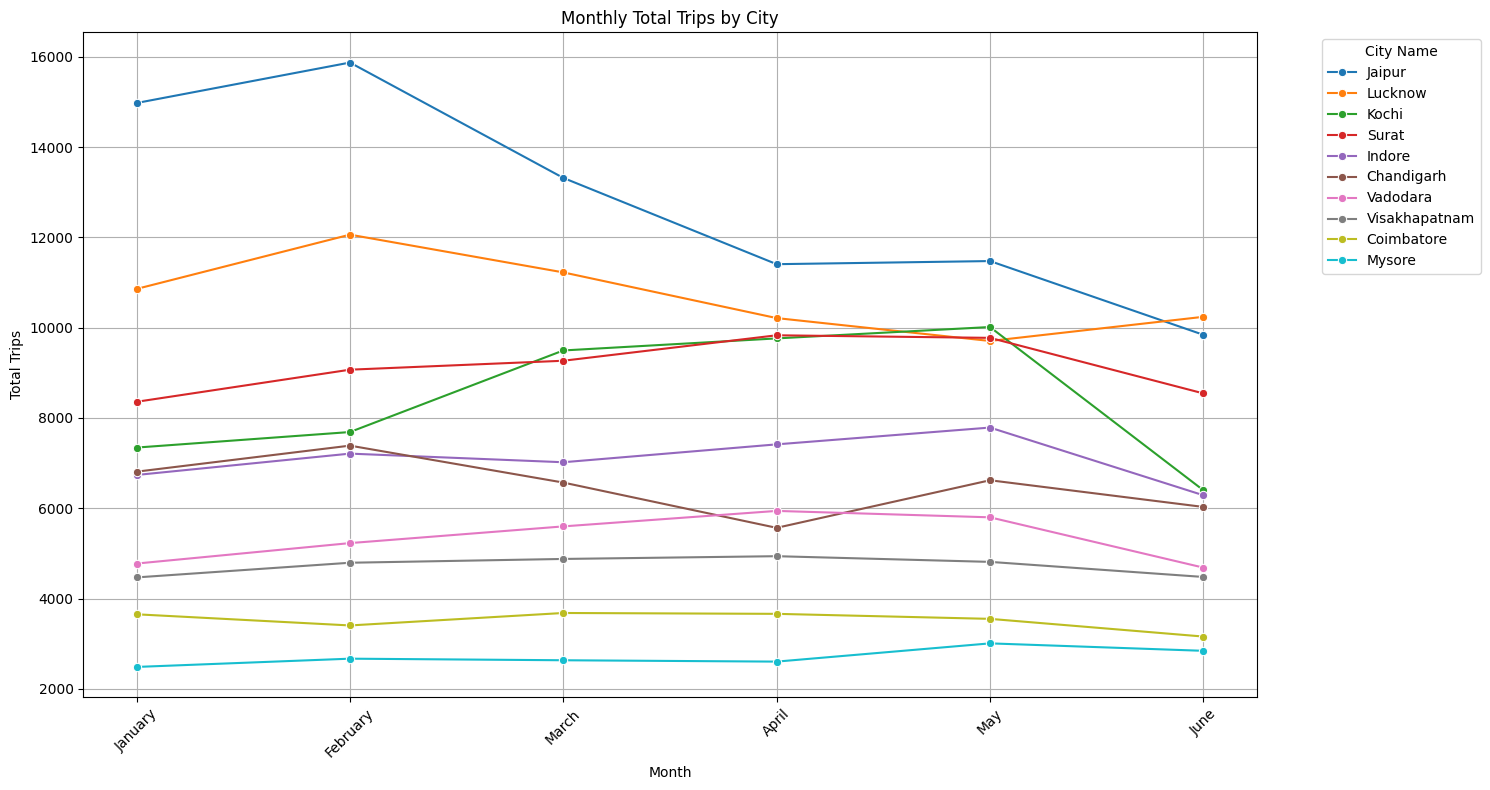

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure for the plot with a suitable size
plt.figure(figsize=(15, 8))

# Generate a line plot showing total trips per month for each city
sns.lineplot(data=monthly_trips, x='month_name', y='total_trips', hue='city_name', marker='o')

# Set the title of the plot
plt.title('Monthly Total Trips by City')

# Label the x-axis and y-axis
plt.xlabel('Month')
plt.ylabel('Total Trips')

# Rotate the x-axis labels by 45 degrees to prevent overlap
plt.xticks(rotation=45)

# Add a legend to the plot with the title 'City Name', placed outside the plot area
plt.legend(title='City Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a grid to the plot for easier interpretation
plt.grid(True)

# Adjust the plot layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [84]:
trip_demand=merged_df.groupby(['city_name','day_type']).agg(trip_count=('day_type','count'))

trip_demand

trip_count
city_name     day_type            
Chandigarh    Weekday        19914
              Weekend        19067
Coimbatore    Weekday        12576
              Weekend         8528
Indore        Weekday        21198
              Weekend        21258
Jaipur        Weekday        32491
              Weekend        44397
Kochi         Weekday        22915
              Weekend        27787
Lucknow       Weekday        49617
              Weekend        14682
Mysore        Weekday         6424
              Weekend         9814
Surat         Weekday        37793
              Weekend        17050
Vadodara      Weekday        20310
              Weekend        11716
Visakhapatnam Weekday        15100
              Weekend        13266

In [85]:
df4


,month,city_id,trip_count,repeat_passenger_count
0,2024-01-01,AP01,10-Trips,7
1,2024-01-01,AP01,2-Trips,352
2,2024-01-01,AP01,3-Trips,158
3,2024-01-01,AP01,4-Trips,53
4,2024-01-01,AP01,5-Trips,38
...,...,...,...,...
535,2024-06-01,UP01,5-Trips,272
536,2024-06-01,UP01,6-Trips,272
537,2024-06-01,UP01,7-Trips,246
538,2024-06-01,UP01,8-Trips,83


In [86]:
df2

,city_id,city_name
0,RJ01,Jaipur
1,UP01,Lucknow
2,GJ01,Surat
3,KL01,Kochi
4,MP01,Indore
5,CH01,Chandigarh
6,GJ02,Vadodara
7,AP01,Visakhapatnam
8,TN01,Coimbatore
9,KA01,Mysore


**Reasoning**:
To aggregate `df4` and then merge it with `df2`, I will first group `df4` by `city_id` and `trip_count` and sum `repeat_passenger_count`. Then I will merge the result with `df2` on `city_id` to add `city_name`.



In [87]:
repeat_trip_frequency = df4.groupby(['city_id', 'trip_count']).agg(total_repeat_passengers=('repeat_passenger_count', 'sum')).reset_index()
repeat_trip_frequency = pd.merge(repeat_trip_frequency, df2, on='city_id', how='left')
repeat_trip_frequency

,city_id,trip_count,total_repeat_passengers,city_name
0,AP01,10-Trips,47,Visakhapatnam
1,AP01,2-Trips,2618,Visakhapatnam
2,AP01,3-Trips,1275,Visakhapatnam
3,AP01,4-Trips,510,Visakhapatnam
4,AP01,5-Trips,278,Visakhapatnam
...,...,...,...,...
85,UP01,5-Trips,1768,Lucknow
86,UP01,6-Trips,1937,Lucknow
87,UP01,7-Trips,1087,Lucknow
88,UP01,8-Trips,617,Lucknow


**Reasoning**:
To calculate the percentage of repeat passengers within each `trip_count` category for each city, I will first calculate the total number of repeat passengers per city. Then, I will merge this total back into the `repeat_trip_frequency` DataFrame and compute the percentage for each category.



In [88]:
city_total_repeat_passengers = repeat_trip_frequency.groupby('city_name')['total_repeat_passengers'].sum().reset_index()
city_total_repeat_passengers

,city_name,total_repeat_passengers
0,Chandigarh,5070
1,Coimbatore,2551
2,Indore,7216
3,Jaipur,9682
4,Kochi,7626
5,Lucknow,9597
6,Mysore,1477
7,Surat,8638
8,Vadodara,4346
9,Visakhapatnam,5108


6.	Repeat Passenger Frequency and City Contribution Analysis
•	Analyse the frequency of trips taken by repeat passengers in each city (e.g., % of repeat passengers taking 2 trips, 3 trips, etc.). Identify which cities contribute most to higher trip frequencies among repeat passengers, and examine if there are distingu ishable patterns between tourism-focused and business-focused cities.


In [89]:

city_total_repeat_passengers.rename(columns={'total_repeat_passengers': 'overall_city_total_repeat_passengers'}, inplace=True)

In [90]:


repeat_trip_frequency = pd.merge(repeat_trip_frequency, city_total_repeat_passengers, on='city_name', how='left')

repeat_trip_frequency['percentage_of_total_repeat_passengers'] = (repeat_trip_frequency['total_repeat_passengers'] / repeat_trip_frequency['overall_city_total_repeat_passengers']) * 100

repeat_trip_frequency.head()

,city_id,trip_count,total_repeat_passengers,city_name,overall_city_total_repeat_passengers,percentage_of_total_repeat_passengers
0,AP01,10-Trips,47,Visakhapatnam,5108,0.920125
1,AP01,2-Trips,2618,Visakhapatnam,5108,51.252937
2,AP01,3-Trips,1275,Visakhapatnam,5108,24.960846
3,AP01,4-Trips,510,Visakhapatnam,5108,9.984338
4,AP01,5-Trips,278,Visakhapatnam,5108,5.442443


**Reasoning**:
To identify cities with a higher proportion of repeat passengers taking more trips, I will first filter the `repeat_trip_frequency` DataFrame to include only the '5-Trips' and '10-Trips' categories. Then, I will group by `city_name` and sum the `percentage_of_total_repeat_passengers` for these categories.



In [91]:
high_frequency_trips = repeat_trip_frequency[repeat_trip_frequency['trip_count'].isin(['5-Trips', '10-Trips'])]

city_high_frequency_percentage = high_frequency_trips.groupby('city_name')['percentage_of_total_repeat_passengers'].sum().sort_values(ascending=False).reset_index()

print("Cities with higher proportion of repeat passengers taking more trips (5-Trips and 10-Trips):")
print(city_high_frequency_percentage)

Cities with higher proportion of repeat passengers taking more trips (5-Trips and 10-Trips):
       city_name  percentage_of_total_repeat_passengers
0     Coimbatore                              21.834575
1          Surat                              21.104422
2       Vadodara                              19.673263
3        Lucknow                              19.526936
4     Chandigarh                              14.003945
5         Indore                              11.848670
6          Kochi                               7.290847
7         Jaipur                               7.260897
8  Visakhapatnam                               6.362569
9         Mysore                               6.296547


**Reasoning**:
To categorize cities into 'Tourism' and 'Business' based on general knowledge, I will define a dictionary mapping each city to its respective category. This dictionary will then be used to create a new 'city_category' column in the `repeat_trip_frequency` DataFrame. This setup is crucial for analyzing repeat trip frequency patterns between the two city types.



In [92]:
city_category_mapping = {
    'Jaipur': 'Tourism',
    'Kochi': 'Tourism',
    'Visakhapatnam': 'Tourism', # Assuming Visakhapatnam has significant tourism due to coastal location
    'Mysore': 'Tourism', # Famous for palaces and heritage
    'Chandigarh': 'Business', # Known for its planned architecture and IT industry
    'Coimbatore': 'Business', # Industrial hub
    'Indore': 'Business', # Commercial capital of Madhya Pradesh
    'Lucknow': 'Business', # Administrative and educational hub
    'Surat': 'Business', # Diamond and textile hub
    'Vadodara': 'Business' # Industrial and educational hub
}

repeat_trip_frequency['city_category'] = repeat_trip_frequency['city_name'].map(city_category_mapping)
repeat_trip_frequency.head()

,city_id,trip_count,total_repeat_passengers,city_name,overall_city_total_repeat_passengers,percentage_of_total_repeat_passengers,city_category
0,AP01,10-Trips,47,Visakhapatnam,5108,0.920125,Tourism
1,AP01,2-Trips,2618,Visakhapatnam,5108,51.252937,Tourism
2,AP01,3-Trips,1275,Visakhapatnam,5108,24.960846,Tourism
3,AP01,4-Trips,510,Visakhapatnam,5108,9.984338,Tourism
4,AP01,5-Trips,278,Visakhapatnam,5108,5.442443,Tourism


**Reasoning**:
Now that the cities are categorized, I will group the `repeat_trip_frequency` DataFrame by `city_category` and `trip_count` and calculate the mean of `percentage_of_total_repeat_passengers` to analyze patterns between 'Tourism' and 'Business' cities.



In [93]:
category_frequency_patterns = repeat_trip_frequency.groupby(['city_category', 'trip_count']).agg(
    mean_percentage_repeat_passengers=('percentage_of_total_repeat_passengers', 'mean')
).reset_index()

# Sort by trip_count for better readability (e.g., 2-Trips, 3-Trips, ..., 10-Trips)
# First, convert 'trip_count' to a categorical type with a specific order
trip_count_order = ['2-Trips', '3-Trips', '4-Trips', '5-Trips', '10-Trips']
category_frequency_patterns['trip_count'] = pd.Categorical(
    category_frequency_patterns['trip_count'],
    categories=trip_count_order,
    ordered=True
)
category_frequency_patterns = category_frequency_patterns.sort_values(by=['city_category', 'trip_count'])

print("Average percentage of repeat passengers by city category and trip count:")
print(category_frequency_patterns)

Average percentage of repeat passengers by city category and trip count:
   city_category trip_count  mean_percentage_repeat_passengers
1       Business    2-Trips                          17.858159
2       Business    3-Trips                          16.659242
3       Business    4-Trips                          15.663604
4       Business    5-Trips                          16.566921
0       Business   10-Trips                           1.431714
5       Business        NaN                          14.935660
6       Business        NaN                           9.544377
7       Business        NaN                           5.221148
8       Business        NaN                           2.119174
10       Tourism    2-Trips                          49.452719
11       Tourism    3-Trips                          23.620594
12       Tourism    4-Trips                          11.660738
13       Tourism    5-Trips                           6.008230
9        Tourism   10-Trips                  

**Reasoning**:
To visualize the average percentage of repeat passengers by city category and trip count, I will create a grouped bar chart using the `category_frequency_patterns` DataFrame. This will clearly show the patterns between 'Tourism' and 'Business' cities for different trip frequencies.



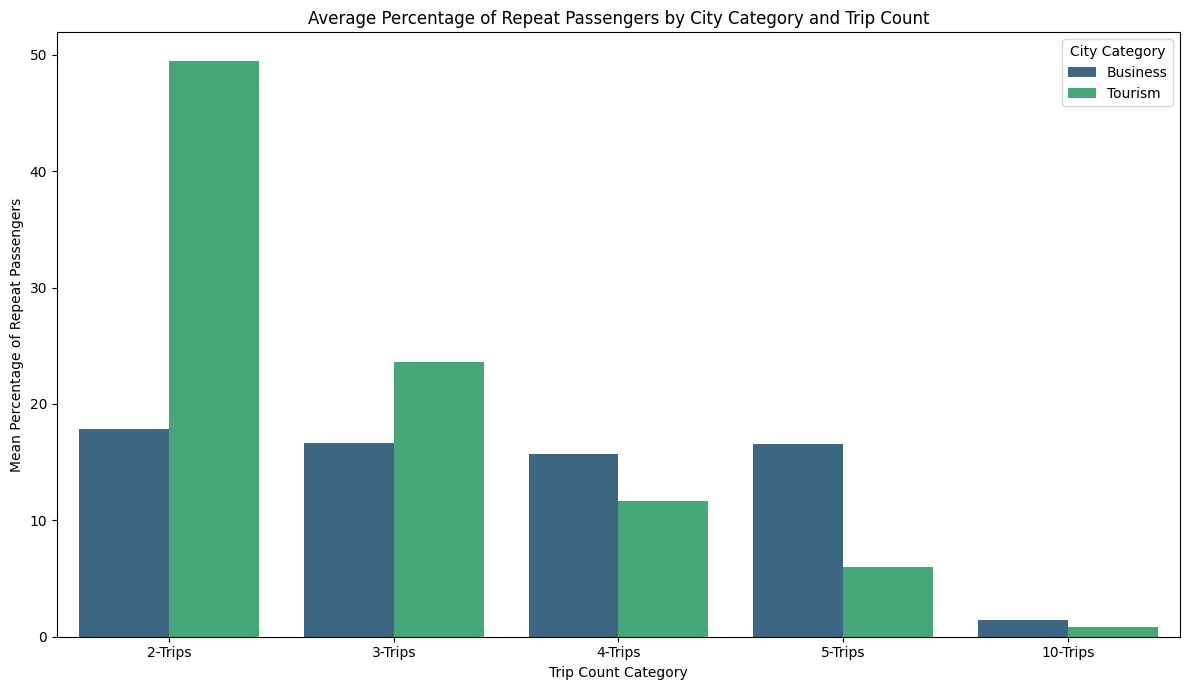

In [94]:


# Create a figure for the plot with a suitable size
plt.figure(figsize=(12, 7))

# Generate a grouped bar chart
sns.barplot(data=category_frequency_patterns, x='trip_count', y='mean_percentage_repeat_passengers', hue='city_category', palette='viridis')

# Set the title of the plot
plt.title('Average Percentage of Repeat Passengers by City Category and Trip Count')

# Label the x-axis and y-axis
plt.xlabel('Trip Count Category')
plt.ylabel('Mean Percentage of Repeat Passengers')

# Add a legend to the plot
plt.legend(title='City Category')

# Ensure tight layout and display the plot
plt.tight_layout()
plt.show()

7.	Month ly Target Ach ievement Analysis for Key Metrics
  For each city, evaluate monthly performance against targets for total trips, new passengers, and average passenger ratings from targets db. Determine if each metric met, exceeded, or missed the target, and calculate the percentage difference. Identify any consistent patterns in target ach ievement, particularly across tou rism versus business-focused cities.


In [95]:
df7['month'] = pd.to_datetime(df7['month'])
print("df7 'month' column converted to datetime.")
df7.head()

df7 'month' column converted to datetime.


,month,city_id,total_target_trips
0,2024-03-01,MP01,7000
1,2024-05-01,KA01,2500
2,2024-04-01,UP01,11000
3,2024-02-01,GJ02,6000
4,2024-05-01,KL01,9000


**Reasoning**:
I will group the `merged_df` by 'city_id', 'city_name', and 'start_of_month' to count the total `trip_id` for each city per month, creating `actual_monthly_trips` as instructed.



In [96]:
actual_monthly_trips = merged_df.groupby(['city_id', 'city_name', 'start_of_month']).agg(actual_total_trips=('trip_id', 'count')).reset_index()
actual_monthly_trips.head()

,city_id,city_name,start_of_month,actual_total_trips
0,AP01,Visakhapatnam,2024-01-01,4468
1,AP01,Visakhapatnam,2024-02-01,4793
2,AP01,Visakhapatnam,2024-03-01,4877
3,AP01,Visakhapatnam,2024-04-01,4938
4,AP01,Visakhapatnam,2024-05-01,4812


**Reasoning**:
I need to rename the 'start_of_month' column in `actual_monthly_trips` to 'month' to align with the column name in `df7` for the upcoming merge.



In [97]:
actual_monthly_trips = actual_monthly_trips.rename(columns={'start_of_month': 'month'})
actual_monthly_trips.head()

,city_id,city_name,month,actual_total_trips
0,AP01,Visakhapatnam,2024-01-01,4468
1,AP01,Visakhapatnam,2024-02-01,4793
2,AP01,Visakhapatnam,2024-03-01,4877
3,AP01,Visakhapatnam,2024-04-01,4938
4,AP01,Visakhapatnam,2024-05-01,4812


**Reasoning**:
Now that `actual_monthly_trips` and `df7` both have a 'month' column in datetime format, I will merge them using 'city_id' and 'month' as keys to combine actual and target trip data. I will use a left merge to retain all actual trips.



In [98]:
actual_monthly_trips.head()

,city_id,city_name,month,actual_total_trips
0,AP01,Visakhapatnam,2024-01-01,4468
1,AP01,Visakhapatnam,2024-02-01,4793
2,AP01,Visakhapatnam,2024-03-01,4877
3,AP01,Visakhapatnam,2024-04-01,4938
4,AP01,Visakhapatnam,2024-05-01,4812


In [99]:
df7.head()

,month,city_id,total_target_trips
0,2024-03-01,MP01,7000
1,2024-05-01,KA01,2500
2,2024-04-01,UP01,11000
3,2024-02-01,GJ02,6000
4,2024-05-01,KL01,9000


In [100]:
actual_monthly_trips['month'] = pd.to_datetime(actual_monthly_trips['month'])
df7['month'] = pd.to_datetime(df7['month'])

In [101]:
total_trips_achievement = pd.merge(actual_monthly_trips, df7, on=['city_id','month'], how='left')
total_trips_achievement.head()

,city_id,city_name,month,actual_total_trips,total_target_trips
0,AP01,Visakhapatnam,2024-01-01,4468,4500
1,AP01,Visakhapatnam,2024-02-01,4793,4500
2,AP01,Visakhapatnam,2024-03-01,4877,4500
3,AP01,Visakhapatnam,2024-04-01,4938,5000
4,AP01,Visakhapatnam,2024-05-01,4812,5000


**Reasoning**:
The error indicates a type mismatch between the 'month' columns during the merge operation. Although previous steps intended to convert them to datetime, I will explicitly convert both 'month' columns in `actual_monthly_trips` and `df7` to `datetime64[ns]` again immediately before merging to ensure type consistency and prevent the `ValueError`. Then, I will proceed with the merge and the subsequent calculations for achievement status and percentage difference.



In [102]:
# Explicitly ensure 'month' columns are datetime before merging
# Calculate total_trip_percentage_difference
total_trips_achievement['total_trip_percentage_difference'] = (
    (total_trips_achievement['actual_total_trips'] - total_trips_achievement['total_target_trips']) /
    total_trips_achievement['total_target_trips']
) * 100

# Determine total_trip_achievement_status
conditions = [
    total_trips_achievement['actual_total_trips'] >= total_trips_achievement['total_target_trips']
]
choices = ['Target Achieved']
total_trips_achievement['total_trip_achievement_status'] = np.select(conditions, choices, default='Target Not Achieved')

total_trips_achievement.head()

,city_id,city_name,month,actual_total_trips,total_target_trips,total_trip_percentage_difference,total_trip_achievement_status
0,AP01,Visakhapatnam,2024-01-01,4468,4500,-0.711111,Target Not Achieved
1,AP01,Visakhapatnam,2024-02-01,4793,4500,6.511111,Target Achieved
2,AP01,Visakhapatnam,2024-03-01,4877,4500,8.377778,Target Achieved
3,AP01,Visakhapatnam,2024-04-01,4938,5000,-1.240000,Target Not Achieved
4,AP01,Visakhapatnam,2024-05-01,4812,5000,-3.760000,Target Not Achieved


In [103]:
df6.head()

,month,city_id,target_new_passengers
0,2024-05-01,GJ01,1500
1,2024-05-01,GJ02,1500
2,2024-03-01,GJ01,2000
3,2024-05-01,UP01,2000
4,2024-05-01,MP01,2000


**Reasoning**:
To ensure consistency for merging, I will first convert the 'month' column in both `df5` and `df6` DataFrames to datetime objects as specified in the first instruction.



In [104]:
df5['month'] = pd.to_datetime(df5['month'])
df6['month'] = pd.to_datetime(df6['month'])
df5.head()
print("df5 and df6 'month' columns converted to datetime.")

df5 and df6 'month' columns converted to datetime.


In [105]:
df5.head()

,month,city_id,new_passengers,repeat_passengers,total_passengers
0,2024-01-01,AP01,2513,650,3163
1,2024-01-01,CH01,3920,720,4640
2,2024-01-01,GJ01,2432,1184,3616
3,2024-01-01,GJ02,2089,544,2633
4,2024-01-01,KA01,1957,172,2129


**Reasoning**:
Now that the 'month' columns are in datetime format, I will merge `df5` and `df6` on 'city_id' and 'month', then merge the result with `df2` on 'city_id' to include the city names. Following this, I will calculate the percentage difference and achievement status for new passengers as per the instructions.



In [106]:
new_passengers_achievement = pd.merge(df5, df6, on=['city_id', 'month'], how='left')
new_passengers_achievement = pd.merge(new_passengers_achievement, df2, on='city_id', how='left')

# Calculate new_passenger_percentage_difference
new_passengers_achievement['new_passenger_percentage_difference'] = (
    (new_passengers_achievement['new_passengers'] - new_passengers_achievement['target_new_passengers']) /
    new_passengers_achievement['target_new_passengers']
) * 100

# Determine new_passenger_achievement_status we used np.select like where or if else function
conditions = [
    new_passengers_achievement['new_passengers'] >= new_passengers_achievement['target_new_passengers']
]
choices = ['Target Achieved']
new_passengers_achievement['new_passenger_achievement_status'] = np.select(conditions, choices, default='Target Not Achieved')

new_passengers_achievement.head()

,month,city_id,new_passengers,repeat_passengers,total_passengers,target_new_passengers,city_name,new_passenger_percentage_difference,new_passenger_achievement_status
0,2024-01-01,AP01,2513,650,3163,2500,Visakhapatnam,0.520000,Target Achieved
1,2024-01-01,CH01,3920,720,4640,4000,Chandigarh,-2.000000,Target Not Achieved
2,2024-01-01,GJ01,2432,1184,3616,2000,Surat,21.600000,Target Achieved
3,2024-01-01,GJ02,2089,544,2633,1800,Vadodara,16.055556,Target Achieved
4,2024-01-01,KA01,1957,172,2129,2000,Mysore,-2.150000,Target Not Achieved


**Reasoning**:
To calculate the actual monthly average passenger ratings, I will group the `merged_df` by `city_id`, `city_name`, and `start_of_month`, and then compute the mean of the `passenger_rating`.



In [107]:
actual_monthly_avg_ratings = merged_df.groupby(['city_id', 'city_name', 'start_of_month']).agg(actual_avg_passenger_rating=('passenger_rating', 'mean')).reset_index()
actual_monthly_avg_ratings.head()

,city_id,city_name,start_of_month,actual_avg_passenger_rating
0,AP01,Visakhapatnam,2024-01-01,8.553939
1,AP01,Visakhapatnam,2024-02-01,8.465262
2,AP01,Visakhapatnam,2024-03-01,8.426287
3,AP01,Visakhapatnam,2024-04-01,8.370595
4,AP01,Visakhapatnam,2024-05-01,8.387781


**Reasoning**:
To continue with the analysis, I will rename the 'start_of_month' column to 'month' in `actual_monthly_avg_ratings` for consistency, then merge this DataFrame with `df1` on 'city_id' to incorporate target ratings. Finally, I will calculate the percentage difference and achievement status for average passenger ratings as instructed.



In [108]:
import numpy as np

# Rename 'start_of_month' to 'month'
actual_monthly_avg_ratings = actual_monthly_avg_ratings.rename(columns={'start_of_month': 'month'})

# Merge with df1 for target_avg_passenger_rating
avg_passenger_rating_achievement = pd.merge(actual_monthly_avg_ratings, df1, on='city_id', how='left')

# Calculate avg_passenger_rating_percentage_difference
avg_passenger_rating_achievement['avg_passenger_rating_percentage_difference'] = (
    (avg_passenger_rating_achievement['actual_avg_passenger_rating'] - avg_passenger_rating_achievement['target_avg_passenger_rating']) /
    avg_passenger_rating_achievement['target_avg_passenger_rating']
) * 100

# Determine avg_passenger_rating_achievement_status
conditions = [
    avg_passenger_rating_achievement['actual_avg_passenger_rating'] >= avg_passenger_rating_achievement['target_avg_passenger_rating']
]
choices = ['Target Achieved ']
avg_passenger_rating_achievement['avg_passenger_rating_achievement_status'] = np.select(conditions, choices, default='Target Not Achieved')

avg_passenger_rating_achievement.head()

,city_id,city_name,month,actual_avg_passenger_rating,target_avg_passenger_rating,avg_passenger_rating_percentage_difference,avg_passenger_rating_achievement_status
0,AP01,Visakhapatnam,2024-01-01,8.553939,8.5,0.634578,Target Achieved
1,AP01,Visakhapatnam,2024-02-01,8.465262,8.5,-0.408684,Target Not Achieved
2,AP01,Visakhapatnam,2024-03-01,8.426287,8.5,-0.867216,Target Not Achieved
3,AP01,Visakhapatnam,2024-04-01,8.370595,8.5,-1.522407,Target Not Achieved
4,AP01,Visakhapatnam,2024-05-01,8.387781,8.5,-1.320229,Target Not Achieved


**Reasoning**:
To combine the achievement data, I will first merge `total_trips_achievement` with `new_passengers_achievement` on `city_id` and `month`. Then, I will merge the resulting DataFrame with `avg_passenger_rating_achievement` on the same keys to create the final `master_achievement_df`.



In [109]:
total_trips_achievement['month'] = pd.to_datetime(total_trips_achievement['month']) #i made sure that the before merge dated format in same.
new_passengers_achievement['month'] = pd.to_datetime(new_passengers_achievement['month'])
avg_passenger_rating_achievement['month'] = pd.to_datetime(avg_passenger_rating_achievement['month'])

In [110]:
master_achievement_df = pd.merge(total_trips_achievement, new_passengers_achievement, on=['city_id', 'month'], how='left')
master_achievement_df = pd.merge(master_achievement_df, avg_passenger_rating_achievement, on=['city_id', 'month'], how='left')
master_achievement_df.head()

,city_id,city_name_x,month,actual_total_trips,total_target_trips,total_trip_percentage_difference,total_trip_achievement_status,new_passengers,repeat_passengers,total_passengers,target_new_passengers,city_name_y,new_passenger_percentage_difference,new_passenger_achievement_status,city_name,actual_avg_passenger_rating,target_avg_passenger_rating,avg_passenger_rating_percentage_difference,avg_passenger_rating_achievement_status
0,AP01,Visakhapatnam,2024-01-01,4468,4500,-0.711111,Target Not Achieved,2513,650,3163,2500,Visakhapatnam,0.52,Target Achieved,Visakhapatnam,8.553939,8.5,0.634578,Target Achieved
1,AP01,Visakhapatnam,2024-02-01,4793,4500,6.511111,Target Achieved,2380,790,3170,2500,Visakhapatnam,-4.80,Target Not Achieved,Visakhapatnam,8.465262,8.5,-0.408684,Target Not Achieved
2,AP01,Visakhapatnam,2024-03-01,4877,4500,8.377778,Target Achieved,2170,923,3093,2500,Visakhapatnam,-13.20,Target Not Achieved,Visakhapatnam,8.426287,8.5,-0.867216,Target Not Achieved
3,AP01,Visakhapatnam,2024-04-01,4938,5000,-1.240000,Target Not Achieved,1845,992,2837,2000,Visakhapatnam,-7.75,Target Not Achieved,Visakhapatnam,8.370595,8.5,-1.522407,Target Not Achieved
4,AP01,Visakhapatnam,2024-05-01,4812,5000,-3.760000,Target Not Achieved,1939,951,2890,2000,Visakhapatnam,-3.05,Target Not Achieved,Visakhapatnam,8.387781,8.5,-1.320229,Target Not Achieved


**Reasoning**:
To categorize cities in `master_achievement_df` into 'Tourism' and 'Business' and then analyze achievement patterns, I will apply the existing `city_category_mapping` to the `city_name_x` column of `master_achievement_df` to create a new `city_category` column. Then I will group by this new category and calculate the mean of the specified percentage differences.



In [111]:
city_category_mapping = {
    'Jaipur': 'Tourism',
    'Kochi': 'Tourism',
    'Visakhapatnam': 'Tourism', # Assuming Visakhapatnam has significant tourism due to coastal location
    'Mysore': 'Tourism', # Famous for palaces and heritage
    'Chandigarh': 'Business', # Known for its planned architecture and IT industry
    'Coimbatore': 'Business', # Industrial hub
    'Indore': 'Business', # Commercial capital of Madhya Pradesh
    'Lucknow': 'Business', # Administrative and educational hub
    'Surat': 'Business', # Diamond and textile hub
    'Vadodara': 'Business' # Industrial and educational hub
}

master_achievement_df['city_category'] = master_achievement_df['city_name_x'].map(city_category_mapping)

# Group by 'city_category' and calculate the mean of the percentage differences
categorized_achievement_summary = master_achievement_df.groupby('city_category').agg(
    mean_total_trip_diff=('total_trip_percentage_difference', 'mean'),
    mean_new_passenger_diff=('new_passenger_percentage_difference', 'mean'),
    mean_avg_passenger_rating_diff=('avg_passenger_rating_percentage_difference', 'mean')
)

print("Average achievement patterns by city category:")
print(categorized_achievement_summary)


Average achievement patterns by city category:
               mean_total_trip_diff  mean_new_passenger_diff  \
city_category                                                  
Business                  -5.087672                 4.169387   
Tourism                    9.506716                -5.567639   

               mean_avg_passenger_rating_diff  
city_category                                  
Business                            -6.259461  
Tourism                              1.458592  


8.	Highest and Lowest Repeat Passenger Rate (RPR%) by City and Month
 	Analyse the Repeat Passenger Rate (RPR%) for each city across the sixmonth period. Identify the top 2 and bottom 2 cities based on their RPR% to determine which locations have the strongest and weakest rates.
 	Similarly, analyse the RPR% by month across all cities and identify the months with the highest and lowest repeat passenger rates. This will help to pinpoint any seasonal patterns or months with higher repeat passenger loyalty.


**Reasoning**:
To calculate the RPR% for each city per month, I will create a new column 'RPR%' in `df5` by dividing 'repeat_passengers' by 'total_passengers' and multiplying by 100. This directly addresses the first instruction of the subtask.



In [112]:
df5['RPR%'] = (df5['repeat_passengers'] / df5['total_passengers']) * 100
df5.head()

,month,city_id,new_passengers,repeat_passengers,total_passengers,RPR%
0,2024-01-01,AP01,2513,650,3163,20.550111
1,2024-01-01,CH01,3920,720,4640,15.517241
2,2024-01-01,GJ01,2432,1184,3616,32.743363
3,2024-01-01,GJ02,2089,544,2633,20.660843
4,2024-01-01,KA01,1957,172,2129,8.078910


**Reasoning**:
Now that the 'RPR%' has been calculated and added to `df5`, I will merge `df5` with `df2` on the 'city_id' column to include the `city_name` in the DataFrame, storing the result in `rpr_df` and displaying its head to verify the merge, as instructed.



In [113]:
rpr_df = pd.merge(df5, df2, on='city_id', how='left')
rpr_df.head()

,month,city_id,new_passengers,repeat_passengers,total_passengers,RPR%,city_name
0,2024-01-01,AP01,2513,650,3163,20.550111,Visakhapatnam
1,2024-01-01,CH01,3920,720,4640,15.517241,Chandigarh
2,2024-01-01,GJ01,2432,1184,3616,32.743363,Surat
3,2024-01-01,GJ02,2089,544,2633,20.660843,Vadodara
4,2024-01-01,KA01,1957,172,2129,8.078910,Mysore


**Reasoning**:
To calculate the average RPR% for each city across the six-month period, I will group the `rpr_df` DataFrame by 'city_name' and compute the mean of the 'RPR%' column.



In [114]:
city_avg_rpr = rpr_df.groupby('city_name')['RPR%'].mean().reset_index()
city_avg_rpr.head()

,city_name,RPR%
0,Chandigarh,21.750782
1,Coimbatore,23.671272
2,Indore,32.957829
3,Jaipur,18.329207
4,Kochi,22.376614


**Reasoning**:
To identify and display the top 2 cities with the highest average RPR% and the bottom 2 cities with the lowest average RPR%, I will sort the `city_avg_rpr` DataFrame in descending order for top cities and ascending order for bottom cities, then display the head and tail respectively.



In [115]:
print('Top 2 Cities with Highest Average RPR%:')
display(city_avg_rpr.sort_values(by='RPR%', ascending=False).head(2))

print('\nBottom 2 Cities with Lowest Average RPR%:')
display(city_avg_rpr.sort_values(by='RPR%', ascending=True).head(2))

Top 2 Cities with Highest Average RPR%:


,city_name,RPR%
7,Surat,42.963123
5,Lucknow,38.131873



Bottom 2 Cities with Lowest Average RPR%:


,city_name,RPR%
6,Mysore,11.208195
3,Jaipur,18.329207


**Reasoning**:
To calculate the average RPR% for each month across all cities, I will group the `rpr_df` DataFrame by the 'month' column and compute the mean of the 'RPR%' column.



In [116]:
monthly_avg_rpr = rpr_df.groupby('month')['RPR%'].mean().reset_index()
monthly_avg_rpr.head()

,month,RPR%
0,2024-01-01,19.718611
1,2024-02-01,21.815805
2,2024-03-01,25.980854
3,2024-04-01,29.954389
4,2024-05-01,34.218410


**Reasoning**:
To identify and display the month with the highest and lowest average RPR%, I will find the `idxmax()` and `idxmin()` of the 'RPR%' column in `monthly_avg_rpr` to get the index of these values, and then use these indices to retrieve the corresponding 'month' and 'RPR%' values.



In [117]:
highest_rpr_month = monthly_avg_rpr.loc[monthly_avg_rpr['RPR%'].idxmax()]
lowest_rpr_month = monthly_avg_rpr.loc[monthly_avg_rpr['RPR%'].idxmin()]

print(f"Month with the highest average RPR%: {pd.to_datetime(highest_rpr_month['month']).strftime('%Y-%m-%d')} ({highest_rpr_month['RPR%']:.2f}%) ")
print(f"Month with the lowest average RPR%: {pd.to_datetime(lowest_rpr_month['month']).strftime('%Y-%m-%d')} ({lowest_rpr_month['RPR%']:.2f}%) ")

Month with the highest average RPR%: 2024-05-01 (34.22%) 
Month with the lowest average RPR%: 2024-01-01 (19.72%) 


**Reasoning**:
To visualize the RPR% trends as requested, I will generate a line plot to show monthly RPR% by city, and two bar charts to display the average RPR% by city and by month, ensuring appropriate labels, titles, and legends for clarity.



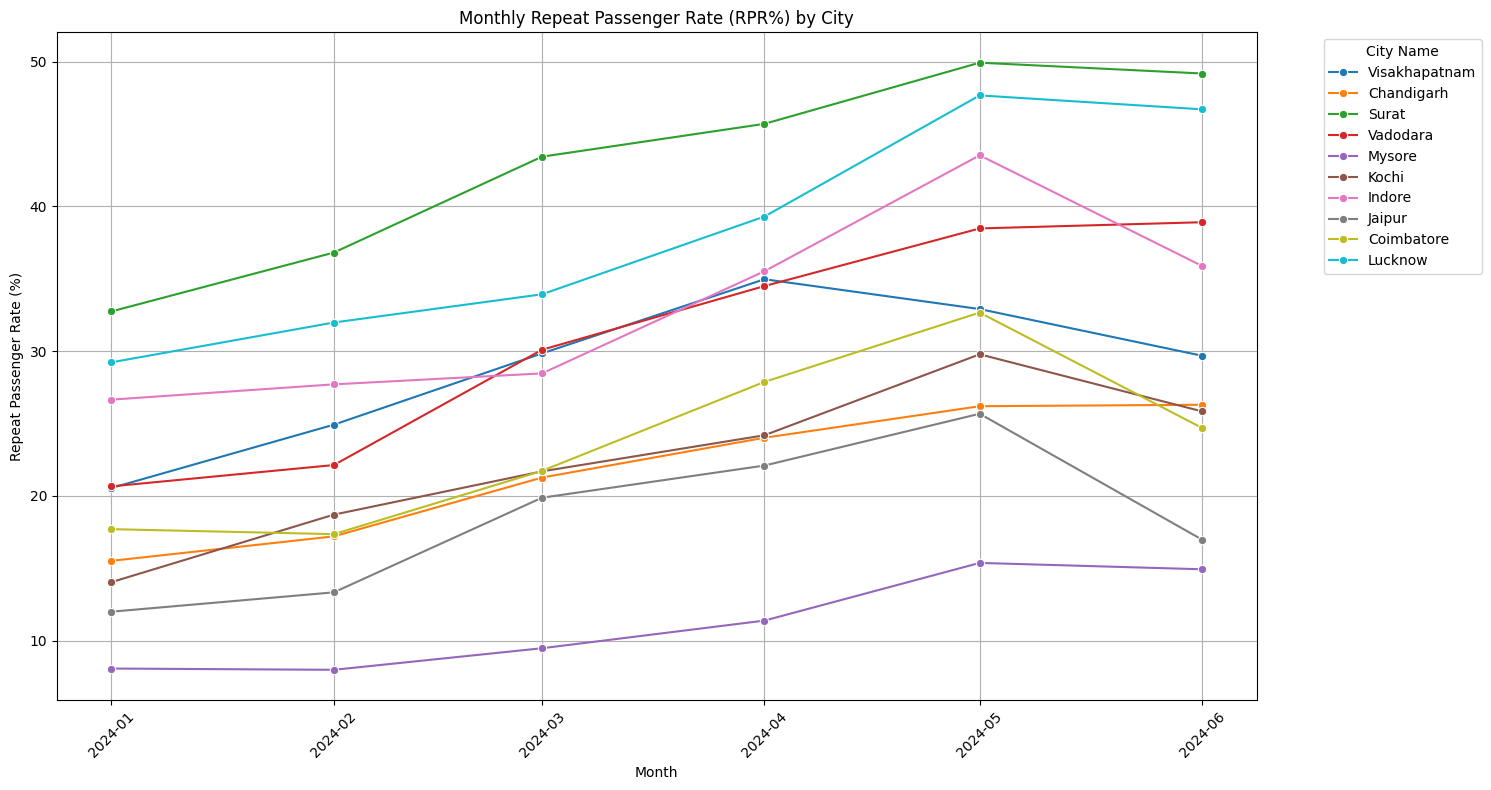

/tmp/ipython-input-2923933.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_avg_rpr.sort_values(by='RPR%', ascending=False), x='city_name', y='RPR%', palette='viridis')


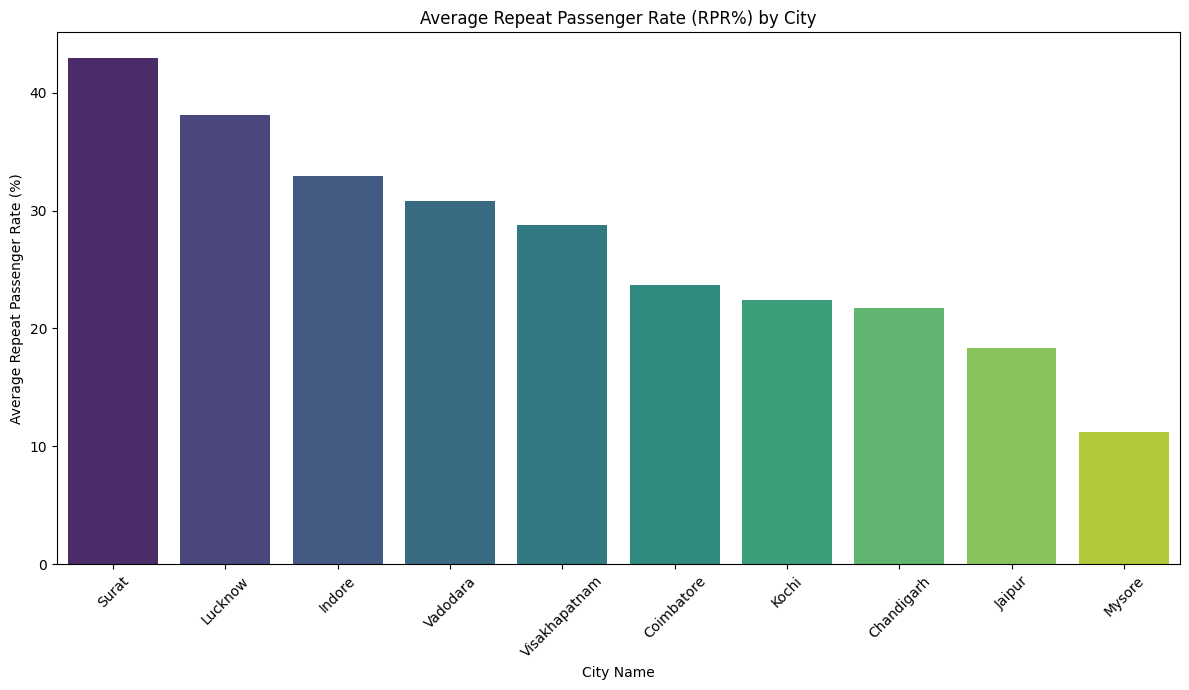

/tmp/ipython-input-2923933.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg_rpr, x='month', y='RPR%', palette='magma')


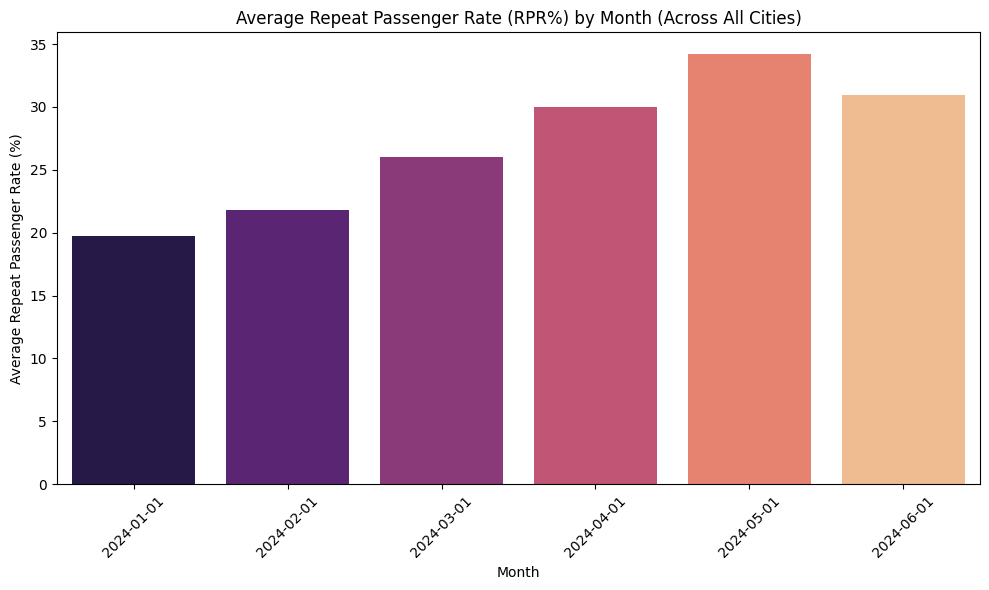

In [118]:
# 1. Line plot for monthly RPR% for each city
plt.figure(figsize=(15, 8))
sns.lineplot(data=rpr_df, x='month', y='RPR%', hue='city_name', marker='o')
plt.title('Monthly Repeat Passenger Rate (RPR%) by City')
plt.xlabel('Month')
plt.ylabel('Repeat Passenger Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='City Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Bar chart for average RPR% by city
plt.figure(figsize=(12, 7))
sns.barplot(data=city_avg_rpr.sort_values(by='RPR%', ascending=False), x='city_name', y='RPR%', palette='viridis')
plt.title('Average Repeat Passenger Rate (RPR%) by City')
plt.xlabel('City Name')
plt.ylabel('Average Repeat Passenger Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Bar chart for average RPR% by month
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg_rpr, x='month', y='RPR%', palette='magma')
plt.title('Average Repeat Passenger Rate (RPR%) by Month (Across All Cities)')
plt.xlabel('Month')
plt.ylabel('Average Repeat Passenger Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` messages because `palette` was used in `sns.barplot` without explicitly assigning a `hue`. To address this, I will assign the `x` variable (either `city_name` or `month`) to the `hue` parameter and set `legend=False` in both `sns.barplot` calls to ensure correct plotting and suppress the warnings, while maintaining the desired visualization.



**Reasoning**:
To assign 'Tourism' or 'Business' categories to each city in the `rpr_df` DataFrame, I will use the predefined `city_category_mapping` dictionary to create a new 'city_category' column by mapping the existing 'city_name' column. This will prepare the data for analysis of RPR% based on city type.



In [119]:

rpr_df['city_category'] = rpr_df['city_name'].map(city_category_mapping)
rpr_df.head()

,month,city_id,new_passengers,repeat_passengers,total_passengers,RPR%,city_name,city_category
0,2024-01-01,AP01,2513,650,3163,20.550111,Visakhapatnam,Tourism
1,2024-01-01,CH01,3920,720,4640,15.517241,Chandigarh,Business
2,2024-01-01,GJ01,2432,1184,3616,32.743363,Surat,Business
3,2024-01-01,GJ02,2089,544,2633,20.660843,Vadodara,Business
4,2024-01-01,KA01,1957,172,2129,8.078910,Mysore,Tourism


**Reasoning**:
To analyze the RPR% based on city type, I will group the `rpr_df` DataFrame by 'city_category' and calculate the mean of the 'RPR%' for each category. This will show the average repeat passenger rate for Tourism vs. Business cities.



In [120]:
rpr_by_city_category = rpr_df.groupby('city_category')['RPR%'].mean().reset_index()
print("Average RPR% by city category:")
print(rpr_by_city_category)

Average RPR% by city category:
  city_category       RPR%
0      Business  31.711446
1       Tourism  20.181322


**Reasoning**:
The previous code block encountered a `KeyError` which might have been due to a transient state or an issue with the DataFrame. Based on the current kernel state, the necessary columns for calculating the percentage differences are present in `master_achievement_df`. Therefore, I will re-execute the same code to categorize cities and then calculate the mean percentage differences for total trips, new passengers, and average passenger ratings, grouped by the newly added 'city_category'.



**Reasoning**:
To investigate the relationship between RPR% and average passenger ratings, I will merge `rpr_df` with `df1` on 'city_id', using a left merge to preserve all monthly RPR% data, and store the result in `rpr_with_ratings_df`.



In [121]:
rpr_with_ratings_df = pd.merge(rpr_df, df1, on='city_id', how='left')
rpr_with_ratings_df.head()

,month,city_id,new_passengers,repeat_passengers,total_passengers,RPR%,city_name,city_category,target_avg_passenger_rating
0,2024-01-01,AP01,2513,650,3163,20.550111,Visakhapatnam,Tourism,8.5
1,2024-01-01,CH01,3920,720,4640,15.517241,Chandigarh,Business,8.0
2,2024-01-01,GJ01,2432,1184,3616,32.743363,Surat,Business,7.0
3,2024-01-01,GJ02,2089,544,2633,20.660843,Vadodara,Business,7.5
4,2024-01-01,KA01,1957,172,2129,8.078910,Mysore,Tourism,8.5


**Reasoning**:
To calculate the correlation at a city level, I will first group the `rpr_with_ratings_df` by `city_name` and compute the average `RPR%` and `target_avg_passenger_rating` for each city. Then, I can calculate the correlation between these two aggregated metrics.



In [122]:
city_level_rpr_ratings = rpr_with_ratings_df.groupby('city_name').agg(
    avg_rpr=('RPR%', 'mean'),
    avg_target_passenger_rating=('target_avg_passenger_rating', 'mean')
).reset_index()

correlation = city_level_rpr_ratings['avg_rpr'].corr(city_level_rpr_ratings['avg_target_passenger_rating'])

print(f"Correlation between Average RPR% and Average Target Passenger Rating: {correlation:.2f}")
city_level_rpr_ratings.head()

Correlation between Average RPR% and Average Target Passenger Rating: -0.82


,city_name,avg_rpr,avg_target_passenger_rating
0,Chandigarh,21.750782,8.00
1,Coimbatore,23.671272,8.25
2,Indore,32.957829,8.00
3,Jaipur,18.329207,8.25
4,Kochi,22.376614,8.50


**Reasoning**:
To analyze monthly trip patterns by city category, I will first add a 'city_category' column to the 'monthly_trips' DataFrame by mapping the 'city_name' using the predefined 'city_category_mapping'. Then, I will group the DataFrame by 'city_category' and 'month_name' to calculate the average 'total_trips' for each category, storing the result in 'monthly_trips_by_category'.



In [123]:
monthly_trips['city_category'] = monthly_trips['city_name'].map(city_category_mapping)

monthly_trips_by_category = monthly_trips.groupby(['city_category', 'month_name']).agg(
    average_total_trips=('total_trips', 'mean')
).reset_index()

monthly_trips_by_category.head()

/tmp/ipython-input-676094843.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trips_by_category = monthly_trips.groupby(['city_category', 'month_name']).agg(


,city_category,month_name,average_total_trips
0,Business,January,6864.833333
1,Business,February,7393.000000
2,Business,March,7226.166667
3,Business,April,7104.333333
4,Business,May,7205.833333


**Reasoning**:
The previous cell produced a `FutureWarning` regarding grouping by categorical columns. To address this and explicitly acknowledge the categorical nature of 'month_name' while grouping, I will add `observed=True` to the `groupby` method. This ensures the correct behavior and suppresses the warning, maintaining the desired aggregation.



In [124]:

monthly_trips['city_category'] = monthly_trips['city_name'].map(city_category_mapping)

monthly_trips_by_category = monthly_trips.groupby(['city_category', 'month_name'], observed=True).agg(
    average_total_trips=('total_trips', 'mean')
).reset_index()

monthly_trips_by_category.head()

,city_category,month_name,average_total_trips
0,Business,January,6864.833333
1,Business,February,7393.000000
2,Business,March,7226.166667
3,Business,April,7104.333333
4,Business,May,7205.833333


**Reasoning**:
To visualize the monthly total trip trends between 'Tourism' and 'Business' cities, I will use a line plot from `seaborn`, plotting 'average_total_trips' against 'month_name' and using 'city_category' as the hue. I will ensure all labels, titles, and legends are correctly set as per the instructions.



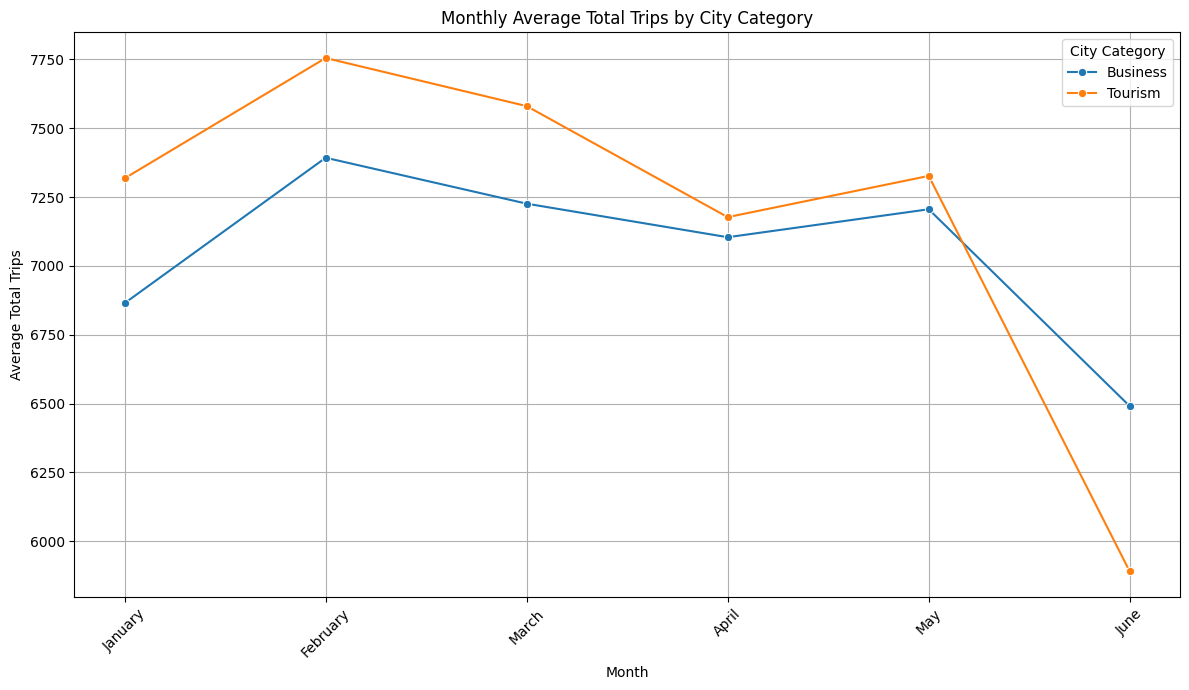

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better readability
plt.figure(figsize=(12, 7))

# Create a line plot comparing monthly total trip trends between 'Tourism' and 'Business' cities
sns.lineplot(data=monthly_trips_by_category, x='month_name', y='average_total_trips', hue='city_category', marker='o')

# Add title and labels
plt.title('Monthly Average Total Trips by City Category')
plt.xlabel('Month')
plt.ylabel('Average Total Trips')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='City Category')

# Add a grid for better readability
plt.grid(True)

# Ensure tight layout
plt.tight_layout()

# Display the plot
plt.show()

**Reasoning**:
To explicitly state how 'Tourism' and 'Business' cities performed against their total trip targets, I will first display the relevant parts of the `categorized_achievement_summary` DataFrame.



In [126]:
print(categorized_achievement_summary[['mean_total_trip_diff']])

               mean_total_trip_diff
city_category                      
Business                  -5.087672
Tourism                    9.506716


5.	Weekend vs. Weekday Trip Demand by City
•	Compare the total trips taken on weekdays versus weekends for each city over the six-month period. Identify cities with a strong preference for


**Reasoning**:
To verify the structure and content of the `trip_demand` DataFrame, I will first display its first few rows.



In [127]:
trip_demand.head()

trip_count
city_name  day_type            
Chandigarh Weekday        19914
           Weekend        19067
Coimbatore Weekday        12576
           Weekend         8528
Indore     Weekday        21198

**Reasoning**:
To display the information about the `trip_demand` DataFrame and check its data types and non-null counts, I will use the `.info()` method.



In [128]:
trip_demand.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20 entries, ('Chandigarh', 'Weekday') to ('Visakhapatnam', 'Weekend')
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   trip_count  20 non-null     int64
dtypes: int64(1)
memory usage: 695.0+ bytes


**Reasoning**:
To easily compare trip counts between weekdays and weekends for each city, I will unstack the `trip_demand` DataFrame, which is currently a MultiIndex Series, so that 'Weekday' and 'Weekend' become distinct columns.



In [130]:
trip_comparison = trip_demand.unstack(level='day_type')
trip_comparison.columns = trip_comparison.columns.droplevel(0)
trip_comparison.head()

day_type,Weekday,Weekend
city_name,,
Chandigarh,19914,19067
Coimbatore,12576,8528
Indore,21198,21258
Jaipur,32491,44397
Kochi,22915,27787


**Reasoning**:
To quantify the preference, I will calculate the absolute difference in trip counts between weekdays and weekends, and then the percentage difference to understand the magnitude of the preference for each city.



In [131]:
trip_comparison['difference'] = abs(trip_comparison['Weekday'] - trip_comparison['Weekend'])
trip_comparison['percentage_difference'] = (trip_comparison['difference'] / trip_comparison[['Weekday', 'Weekend']].max(axis=1)) * 100

trip_comparison['preferred_day_type'] = trip_comparison.apply(lambda row: 'Weekday' if row['Weekday'] > row['Weekend'] else 'Weekend', axis=1)

trip_comparison.head()

day_type,Weekday,Weekend,difference,percentage_difference,preferred_day_type
city_name,,,,,
Chandigarh,19914,19067,847,4.253289,Weekday
Coimbatore,12576,8528,4048,32.188295,Weekday
Indore,21198,21258,60,0.282247,Weekend
Jaipur,32491,44397,11906,26.817127,Weekend
Kochi,22915,27787,4872,17.533379,Weekend


**Reasoning**:
To visually represent the weekday vs. weekend trip patterns for each city, I will create a grouped bar chart using the `trip_comparison` DataFrame. This will clearly show the trip counts for each day type side-by-side for every city, allowing for easy comparison.



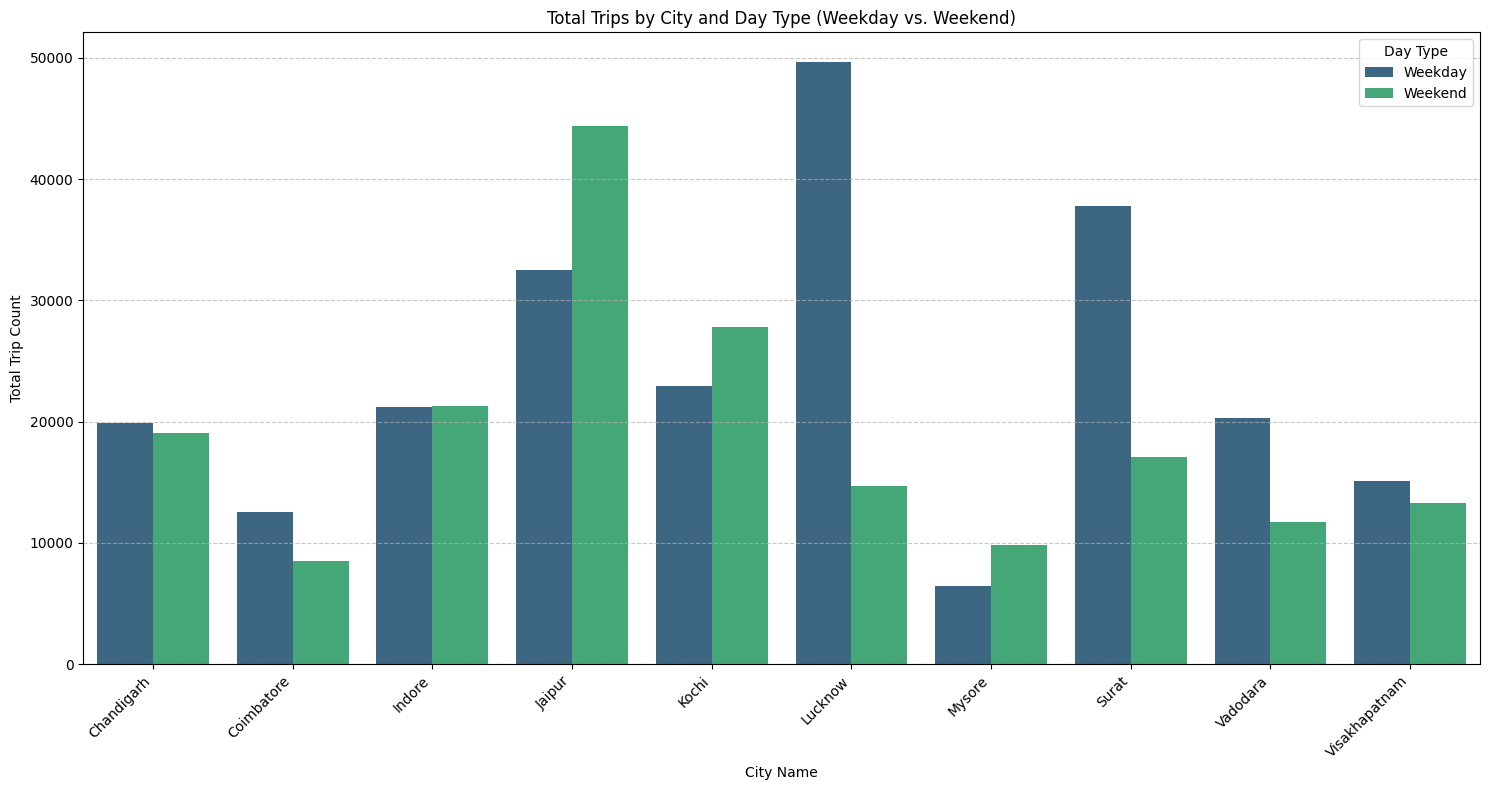

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting by unstacking if it's not already, and resetting index
plot_data = trip_comparison[['Weekday', 'Weekend']].reset_index()
plot_data = plot_data.melt(id_vars='city_name', var_name='day_type', value_name='trip_count')

plt.figure(figsize=(15, 8))
sns.barplot(data=plot_data, x='city_name', y='trip_count', hue='day_type', palette='viridis')

plt.title('Total Trips by City and Day Type (Weekday vs. Weekend)')
plt.xlabel('City Name')
plt.ylabel('Total Trip Count')
plt.xticks(rotation=45, ha='right') # Rotate and align labels for better readability
plt.legend(title='Day Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()